In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
import os

In [25]:
os.chdir('/home/walml/repos/recommender_hack')

In [26]:
from recommender import ratings

In [27]:
!pwd

/home/walml/repos/recommender_hack


In [4]:
com = pd.read_json('/home/walml/Downloads/project-5733-comments_2020-04-01.json')

In [5]:
com

,board_id,board_title,board_description,discussion_id,discussion_title,comment_id,comment_body,comment_focus_id,comment_focus_type,comment_user_id,comment_user_login,comment_created_at
0,1267,Notes,General comment threads about individual subjects,528398,Subject 16215478,876591,The zoom scale of this image is incorrect. I a...,16215478.0,Subject,54,klmasters,2018-01-22 19:45:35.679000+00:00
1,1267,Notes,General comment threads about individual subjects,539286,Subject 16215746,894378,this seems to have a lens effect,16215746.0,Subject,711942,Arnie52,2018-02-06 15:05:44.833000+00:00
2,1267,Notes,General comment threads about individual subjects,528398,Subject 16215478,894381,Agree with @klmasters on scale difference. Ans...,16215478.0,Subject,1428920,MerylPG,2018-02-06 15:13:36.441000+00:00
3,1267,Notes,General comment threads about individual subjects,539298,Subject 16215566,894401,Looks like two galaxies merging,16215566.0,Subject,1430192,mikeroberts17,2018-02-06 15:22:03.160000+00:00
4,1267,Notes,General comment threads about individual subjects,539300,Subject 16215897,894403,appears to have 3 obvious bright objects lined...,16215897.0,Subject,1658250,Giraffes,2018-02-06 15:22:23.471000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
87793,1267,Notes,General comment threads about individual subjects,1310651,Subject 41842156,2128629,Thanks,41842156.0,Subject,2011898,aashish1990,2020-04-01 10:06:53.421000+00:00
87794,1267,Notes,General comment threads about individual subjects,964781,Subject 32411489,2128631,"There is another blue galaxy off the picture, ...",32411489.0,Subject,247,Budgieye,2020-04-01 10:07:22.637000+00:00
87795,1267,Notes,General comment threads about individual subjects,1310672,Subject 36211818,2128632,thanks,36211818.0,Subject,2011898,aashish1990,2020-04-01 10:07:30.422000+00:00
87796,1267,Notes,General comment threads about individual subjects,1252652,Subject 36217883,2128635,Can someone explain me what is the small orang...,36217883.0,Subject,2012840,Valina,2020-04-01 10:08:04.446000+00:00


In [6]:
com = com.query('board_title == "Notes"')

In [7]:
len(com), len(com['comment_user_id'].unique()), len(com['comment_focus_id'].unique()) # 80k comments, 3k users, 45k galaxies (i.e. mean of 2 comments per galaxy)

(80741, 3034, 46439)

In [8]:
galaxies_per_user = com.groupby('comment_user_id').agg({'comment_focus_id': lambda x: len(pd.unique(x))}).reset_index(drop=True)

Text(0.5, 0, 'Galaxies commented on per user')

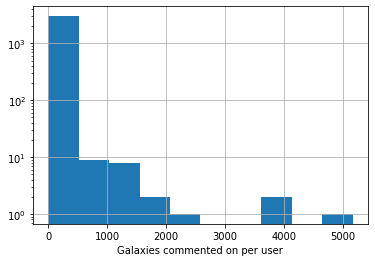

In [9]:
galaxies_per_user[galaxies_per_user < 12000].hist('comment_focus_id')
plt.yscale('log')
plt.title(None)
plt.xlabel('Galaxies commented on per user')

Text(0.5, 0, 'Galaxies commented on per user')

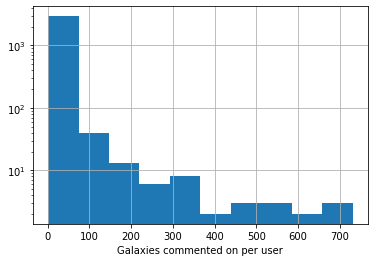

In [10]:
galaxies_per_user[galaxies_per_user < 1000].hist('comment_focus_id')
plt.yscale('log')
plt.title(None)
plt.xlabel('Galaxies commented on per user')

Text(0.5, 0, 'Galaxies commented on per user')

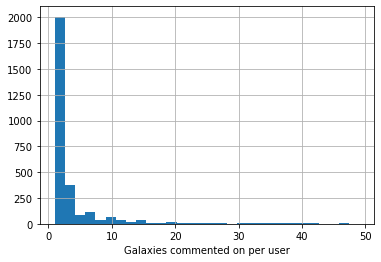

In [11]:
galaxies_per_user[galaxies_per_user < 50].hist('comment_focus_id', bins=30)
# plt.yscale('log')
plt.title(None)
plt.xlabel('Galaxies commented on per user')

In [12]:
(galaxies_per_user == 1).mean()

comment_focus_id    0.509229
dtype: float64

Item-based: *these galaxies are similar to the galaxy you talked about*

User-based: *users who talk about galaxies like yours, also talk about these galaxies*

For new users, with only one or two galaxies, we need use item-based CF. Most talk discussions are made by first-time users.

In [13]:
temp = com.query('discussion_id == 964781')

In [14]:
temp.sort_values('comment_created_at', ascending=True)

,board_id,board_title,board_description,discussion_id,discussion_title,comment_id,comment_body,comment_focus_id,comment_focus_type,comment_user_id,comment_user_login,comment_created_at
47620,1267,Notes,General comment threads about individual subjects,964781,Subject 32411489,1591608,This galaxy looks a bit beat up with the ragge...,32411489.0,Subject,1606700,SearcherPG,2019-04-13 18:09:59.646000+00:00
87783,1267,Notes,General comment threads about individual subjects,964781,Subject 32411489,2128499,Could it be #merger of two?,32411489.0,Subject,2011938,Jillzzzzzzz,2020-04-01 09:24:37.505000+00:00
87794,1267,Notes,General comment threads about individual subjects,964781,Subject 32411489,2128631,"There is another blue galaxy off the picture, ...",32411489.0,Subject,247,Budgieye,2020-04-01 10:07:22.637000+00:00


In [15]:
def get_talk_link(discussion_id, board_id=1267):
    return f'https://www.zooniverse.org/projects/zookeeper/galaxy-zoo/talk/{board_id}/{discussion_id}'

In [16]:
get_talk_link(temp.iloc[0]['discussion_id'])

'https://www.zooniverse.org/projects/zookeeper/galaxy-zoo/talk/1267/964781'

<a href={talk_link} >Link</a>

In [18]:
# comments_per_user[comments_per_user > 100].hist()

In [19]:
# comments_per_user[comments_per_user < 100].hist()
# # plt.yscale('log')

In [20]:
# comments_per_username = com['comment_user_login'].value_counts()
# comments_per_username[:15]

In [21]:
mods = ['ElisabethB', 'Budgieye']


In [22]:
# clean the extreme users from the data - care about new users
comments_per_user = com['comment_user_id'].value_counts()
normal_users = comments_per_user[comments_per_user < 10]

# len(normal_users), len(comments_per_user) ## 2600 users of 3000 make 10 or less comments

normal = com[com['comment_user_id'].isin(normal_users.index)].reset_index()
len(com), len(normal)  ## but the vast majority of comments come from power users

power = com[~com['comment_user_id'].isin(normal_users.index)].reset_index()
len(com), len(power)  ## so lets do power users 
# minus the mods?
power = power[~power['comment_user_login'].isin(mods)]


In [23]:
(comments_per_user > 10).mean()

0.11931443638760712

In [32]:
normal.to_csv('normal.csv', index=False)
power.to_csv('power.csv', index=False)

In [ ]:
# how many 

In [42]:
# total galaxies / galaxies classified by that user * k
df = power.groupby('comment_user_id').agg({'comment_focus_id': 'count'}).reset_index()
df['top1_p'] = df['comment_focus_id'] / df['']
df['top10_p'] = 10 * df['comment_focus_id'] / len(df)  # assuming many galaxies

In [43]:
df['top1_p']

0      0.038860
1      0.038860
2      0.639896
3      0.217617
4      0.033679
         ...   
381    0.031088
382    0.028497
383    0.031088
384    0.025907
385    0.028497
Name: top1_p, Length: 386, dtype: float64

In [44]:
df['top10_p'].mean()

4.594015946736825

In [45]:
ratings_normal = ratings.get_rating_matrix(normal)

(2646, 5126)


In [46]:
print(ratings_normal)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]]


In [51]:
(ratings_normal > 0).mean()

0.0003991625696101478

In [ ]:
np.savetxt('ratings_normal.npy', ratings_normal)

In [52]:
ratings_power = ratings.get_rating_matrix(power)

(386, 43757)


In [53]:
# 0.4% odds that a particular galaxy (with at least one comment) will be commented by a particular power user
(ratings_power > 0).mean()  

0.003749925548551758

In [ ]:
print(ratings_power)

In [ ]:
np.savetxt('ratings_power.npy', ratings_power)

In [ ]:
tags = pd.read_json('/home/walml/Downloads/project-5733-tags_2020-04-01.json')

In [ ]:
tags

In [ ]:
tags['name'].value_counts()[:30]